In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
np.random.seed(44)
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [284]:
ls

 Volume in drive C is OS
 Volume Serial Number is A09C-8A30

 Directory of C:\Users\Ahmed-Basem\Desktop\Current\Corelia\Task 4 - Unbalanced

05/29/2023  09:23 AM    <DIR>          .
05/29/2023  09:23 AM    <DIR>          ..
05/20/2023  06:05 PM    <DIR>          .ipynb_checkpoints
08/30/2022  04:01 PM           561,600 Bank Customer Churn Prediction.csv
05/29/2023  09:23 AM         1,561,927 Code.ipynb
               2 File(s)      2,123,527 bytes
               3 Dir(s)  21,750,845,440 bytes free


In [285]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [286]:
print(f"There are {data.shape[0]} Rows and {data.shape[1]} Columns in our dataset")

There are 10000 Rows and 12 Columns in our dataset


In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [288]:
data.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [289]:
# data = pd.concat([class_1,class_0],axis=0).sample(frac=1).reset_index(drop=True)
# data.head()

In [290]:
data['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [291]:
print(f"Number of duplicated Values is {data.duplicated().sum()}")

Number of duplicated Values is 0


In [292]:
data.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [293]:
data = data.drop('customer_id',axis=1)

In [294]:
def count_plot(col,title):
    plt.figure(figsize=(10,6))
    sns.countplot(data=data,x=col)
    plt.xticks(rotation=30)
    plt.title(title)
    plt.show()
def multi_count_plot(col,col2,title=""):
    plt.figure(figsize=(10,6))
    sns.countplot(data=data,x=col,hue=col2)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()
def pie_plot(col,limit=10,title=''):
    plt.figure(figsize=(10,6))
    plt.pie(x=data[col].value_counts()[:limit],labels=data[col].value_counts()[:limit].index,
           autopct='%1.1f%%')
    plt.title(title)
    plt.show()
def kde_plot(col):
    plt.figure(figsize=(10,6))
    sns.kdeplot(data=data[col],shade=True)
    plt.show()
def barplot_mean(col,title):
    plt.figure(figsize=(10,6))
    sns.barplot(x=data.groupby('churn')[col].mean().index,
                y=data.groupby('churn')[col].mean().values)
    plt.title(title)
    plt.show()
def approved_vs_not(col,Limit=5):
    fig,ax = plt.subplots(figsize=(15,4))
    plt.subplot(1,2,1)
    plt.title('Approved')
    positive = data[data['churn']==1]
    plt.pie(positive[col].value_counts()[:Limit],labels=
        positive[col].value_counts()[:Limit].index,
           autopct='%1.1f%%')
    plt.subplot(1,2,2)
    plt.title('Not Approved')
    negative = data[data['churn']==0]
    plt.pie(negative[col].value_counts()[:Limit],labels=
        negative[col].value_counts()[:Limit].index,
        autopct ='%1.2f%%' )
    plt.show()   
            

## Target Column

In [502]:
import plotly.express as px 

In [504]:
px.bar(data['churn'].value_counts().index , y =data['churn'].value_counts().values )

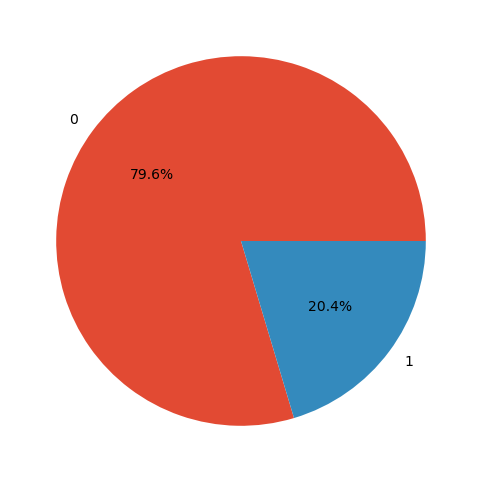

In [297]:
pie_plot('churn')

In [298]:
data.groupby('churn').mean()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [299]:
data.groupby('churn').median()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
churn,,,,,,,,
0,653.0,36.0,5.0,92072.68,2.0,1.0,1.0,99645.04
1,646.0,45.0,5.0,109349.29,1.0,1.0,0.0,102460.84


In [300]:
def get_insights(column):
    print(f"### Columns in {column} its type is {data[column].dtype}")
    print("\n### most appeared values ")
    print(data[column].value_counts().index[:5].values)
    print(f"\n### Number of unique values is \n{data[column].nunique()} ")
    print('\n#### Random Values ####')
    print(data.sample(5)[column].values)

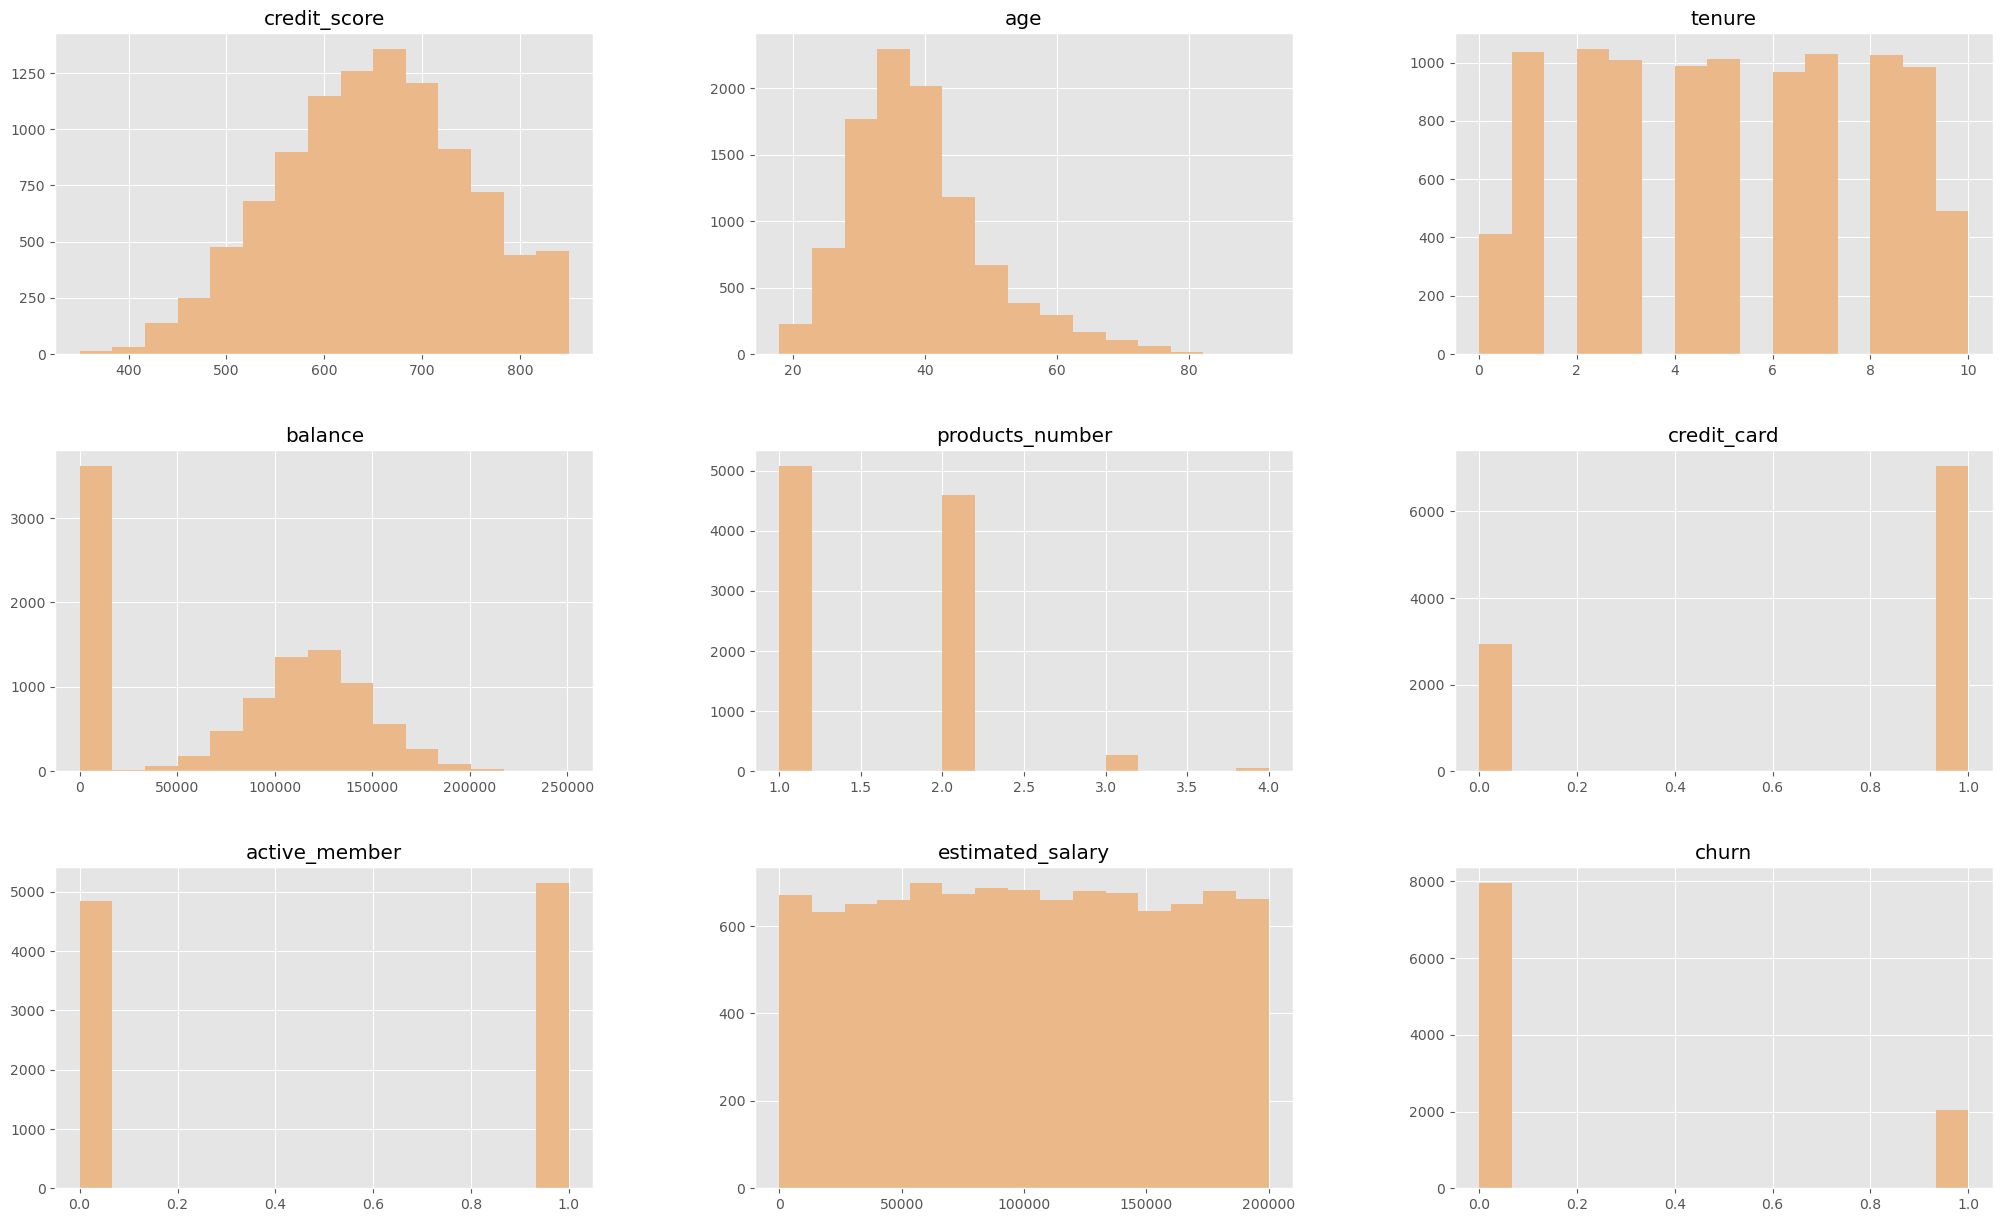

In [301]:
color = '#eab889'
data.hist(bins=15,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 18
plt.show()

In [302]:
get_insights('credit_score')

### Columns in credit_score its type is int64

### most appeared values 
[850 678 655 705 667]

### Number of unique values is 
460 

#### Random Values ####
[594 705 560 588 663]


In [303]:
data['credit_score'].min() , data['credit_score'].max()

(350, 850)

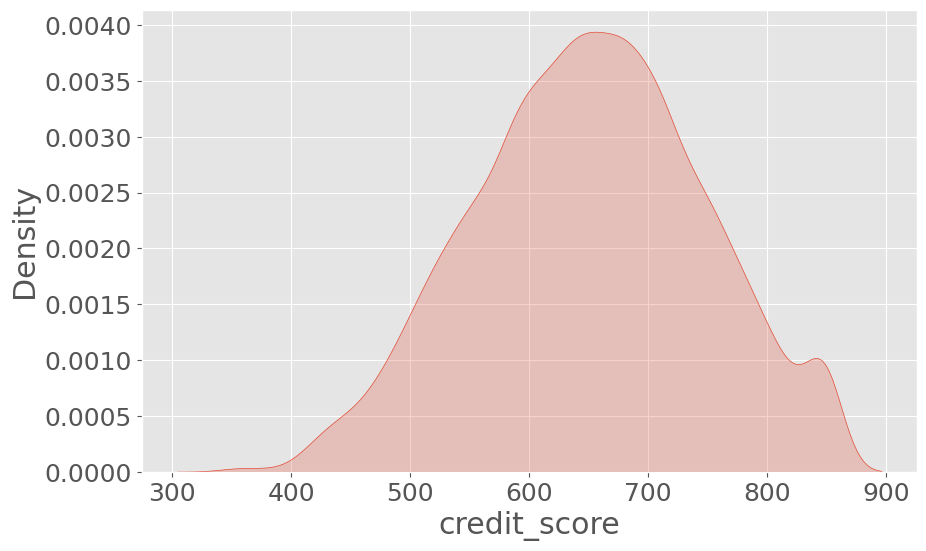

In [304]:
kde_plot('credit_score')

In [305]:
get_insights('country')

### Columns in country its type is object

### most appeared values 
['France' 'Germany' 'Spain']

### Number of unique values is 
3 

#### Random Values ####
['France' 'Germany' 'Germany' 'France' 'Germany']


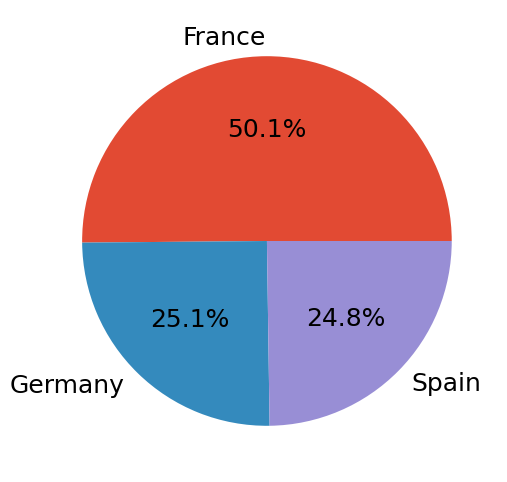

In [306]:
pie_plot('country',"The count of Each country")

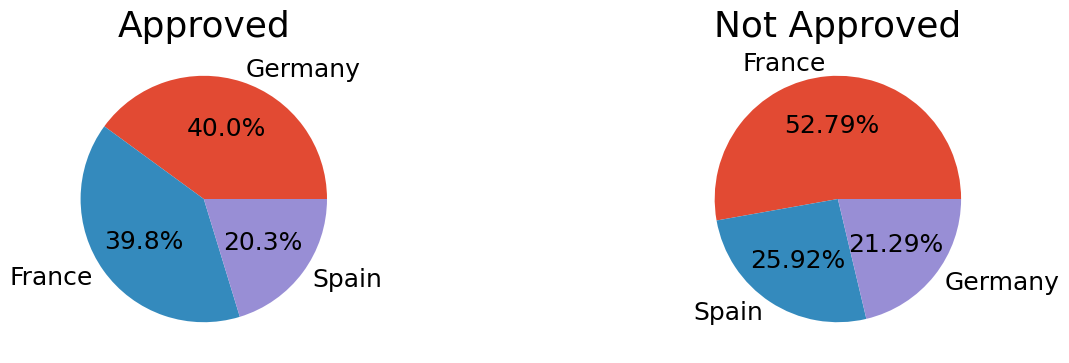

In [307]:
approved_vs_not('country')

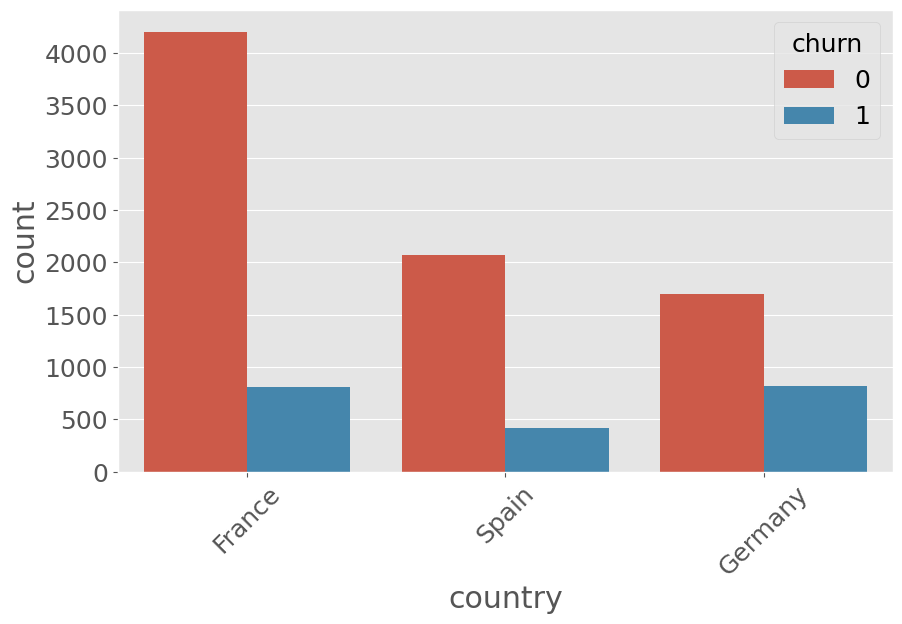

In [308]:
multi_count_plot('country','churn')

### gender

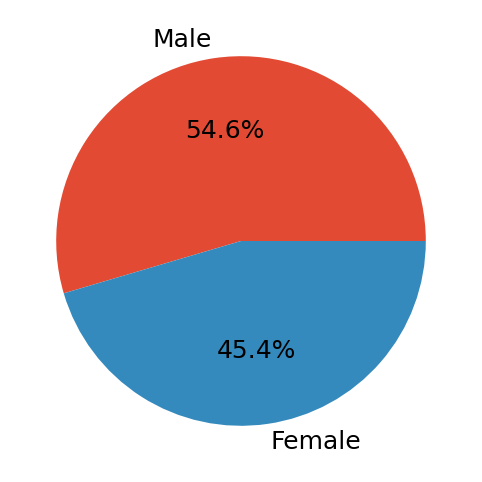

In [309]:
pie_plot('gender')

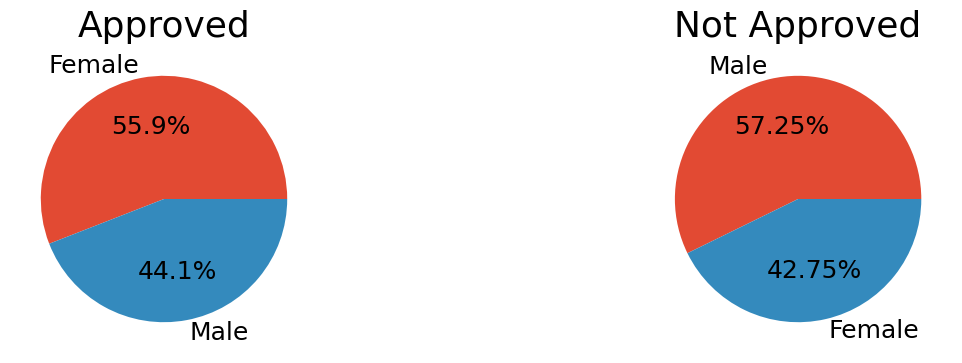

In [310]:
approved_vs_not('gender')

### age

In [311]:
data['age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

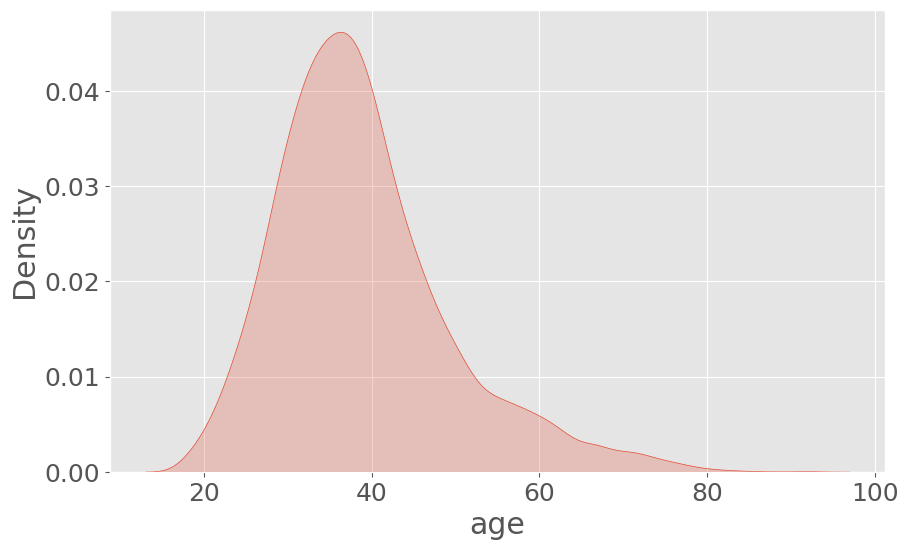

In [312]:
kde_plot('age')

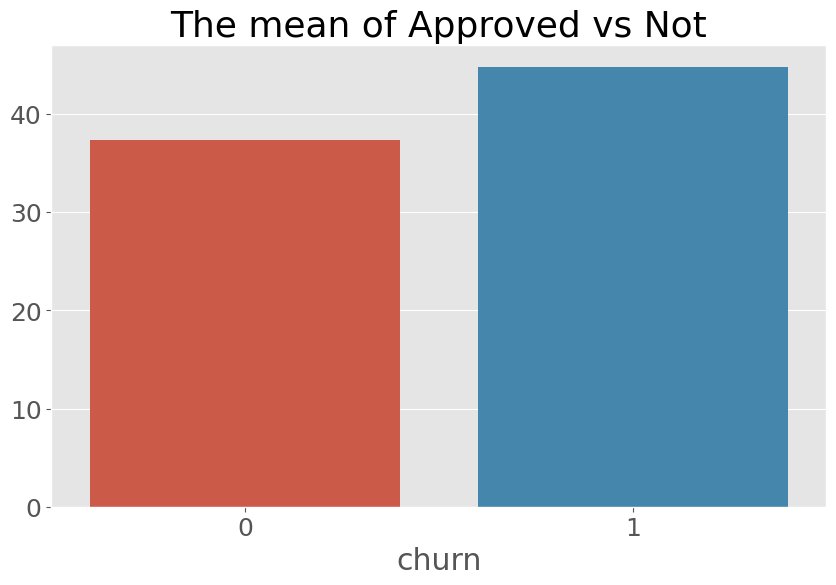

In [313]:
barplot_mean('age',"The mean of Approved vs Not")

In [314]:
data = data[data['age'] < 80]

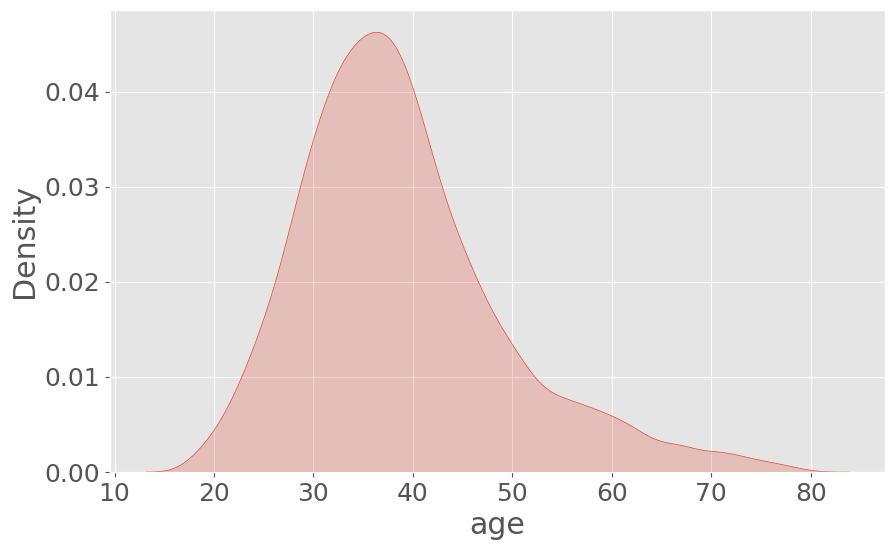

In [315]:
kde_plot('age')

### tenure

In [316]:
get_insights('tenure')

### Columns in tenure its type is int64

### most appeared values 
[2 1 7 8 5]

### Number of unique values is 
11 

#### Random Values ####
[7 0 9 7 4]


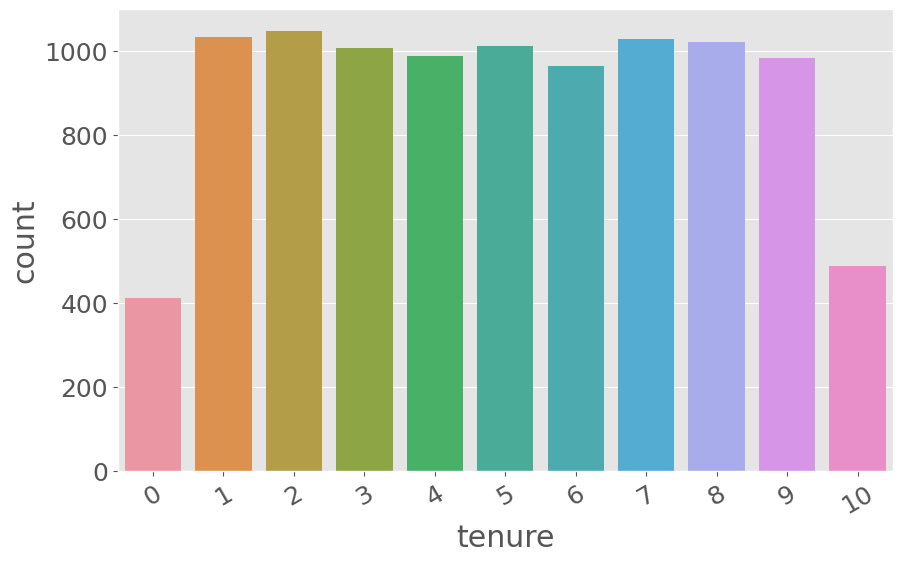

In [317]:
count_plot('tenure',"")

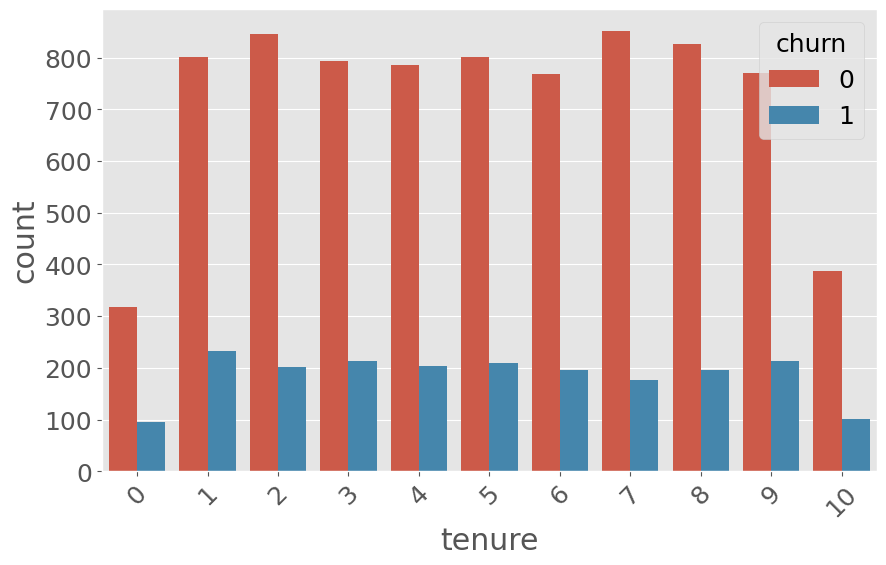

In [318]:
multi_count_plot('tenure','churn')

In [319]:
data.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

### balance

In [320]:
get_insights('balance')

### Columns in balance its type is float64

### most appeared values 
[     0.   130170.82 105473.74 132371.3  125385.01]

### Number of unique values is 
6376 

#### Random Values ####
[     0.   124616.23      0.        0.   132387.91]


In [321]:
data['balance'].describe()

count      9985.000000
mean      76533.380252
std       62394.670312
min           0.000000
25%           0.000000
50%       97259.250000
75%      127661.690000
max      250898.090000
Name: balance, dtype: float64

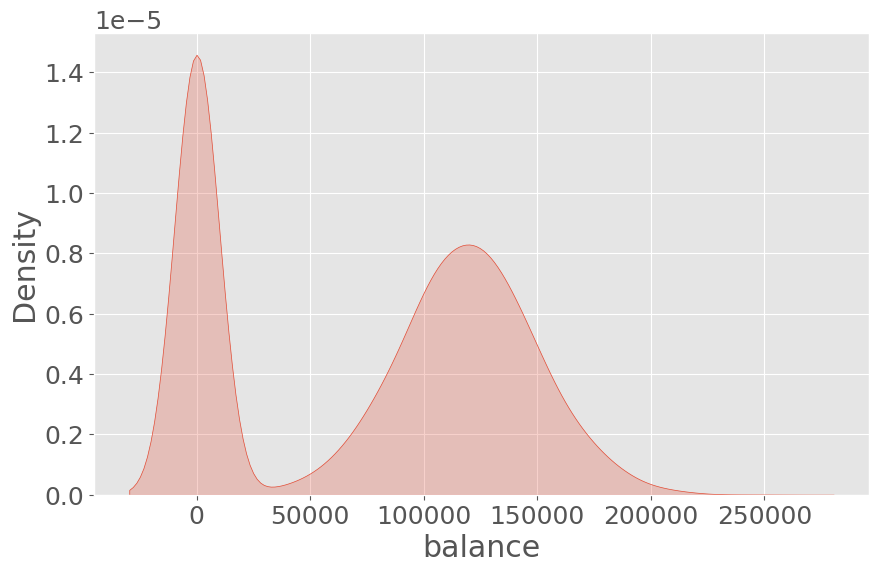

In [322]:
kde_plot('balance')

In [323]:
data[data['balance'] < 1]['churn'].value_counts()

0    3108
1     500
Name: churn, dtype: int64

In [324]:
get_insights('products_number')

### Columns in products_number its type is int64

### most appeared values 
[1 2 3 4]

### Number of unique values is 
4 

#### Random Values ####
[1 2 2 2 1]


In [325]:
data['products_number'] = data['products_number'].astype(str)

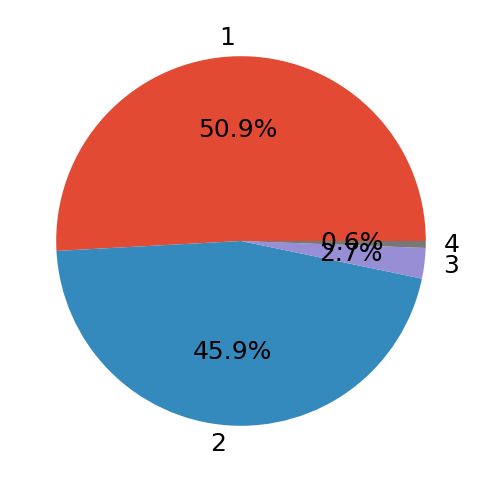

In [326]:
pie_plot('products_number')

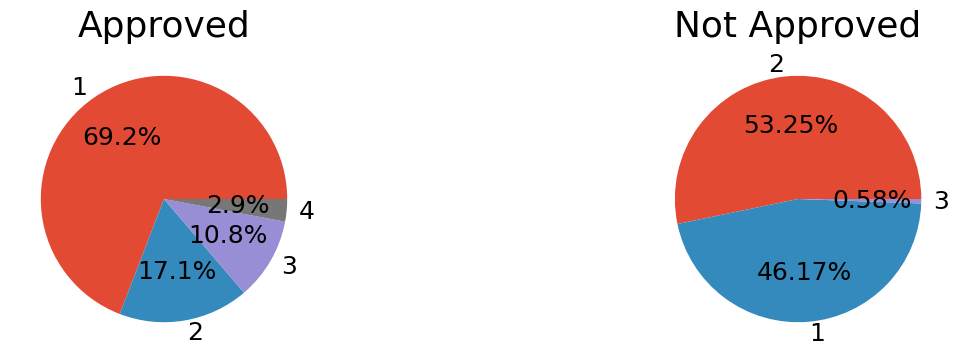

In [327]:
approved_vs_not('products_number')

In [328]:
get_insights('credit_card')

### Columns in credit_card its type is int64

### most appeared values 
[1 0]

### Number of unique values is 
2 

#### Random Values ####
[1 1 1 1 1]


In [329]:
data['credit_card'] = data['credit_card'].astype(str)

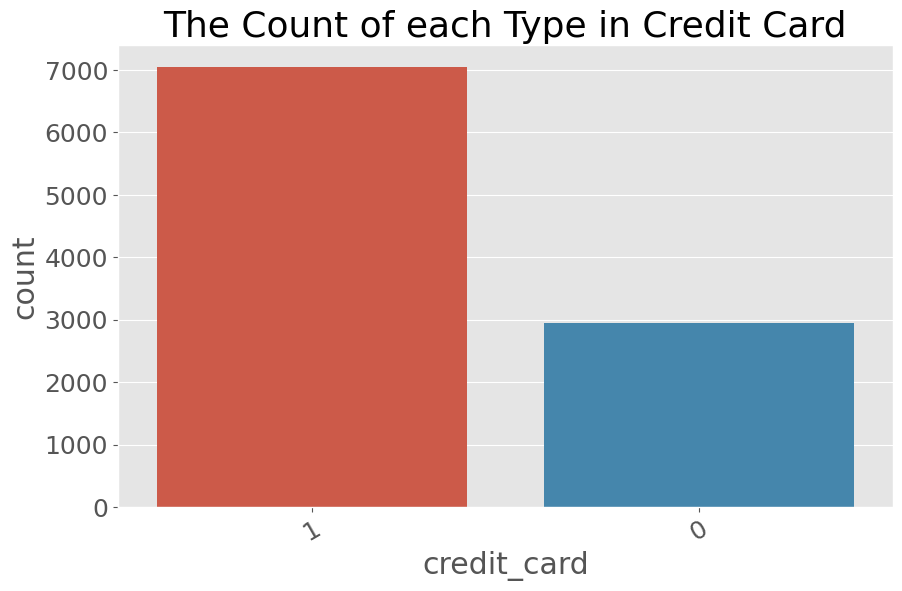

In [330]:
count_plot('credit_card',"The Count of each Type in Credit Card")

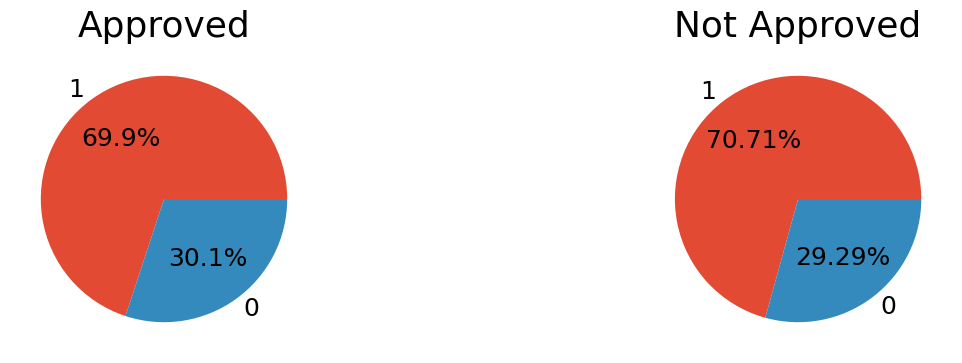

In [331]:
approved_vs_not('credit_card')

In [332]:
get_insights('active_member')

### Columns in active_member its type is int64

### most appeared values 
[1 0]

### Number of unique values is 
2 

#### Random Values ####
[0 1 1 0 1]


In [333]:
data['active_member'] = data['active_member'].astype(str)

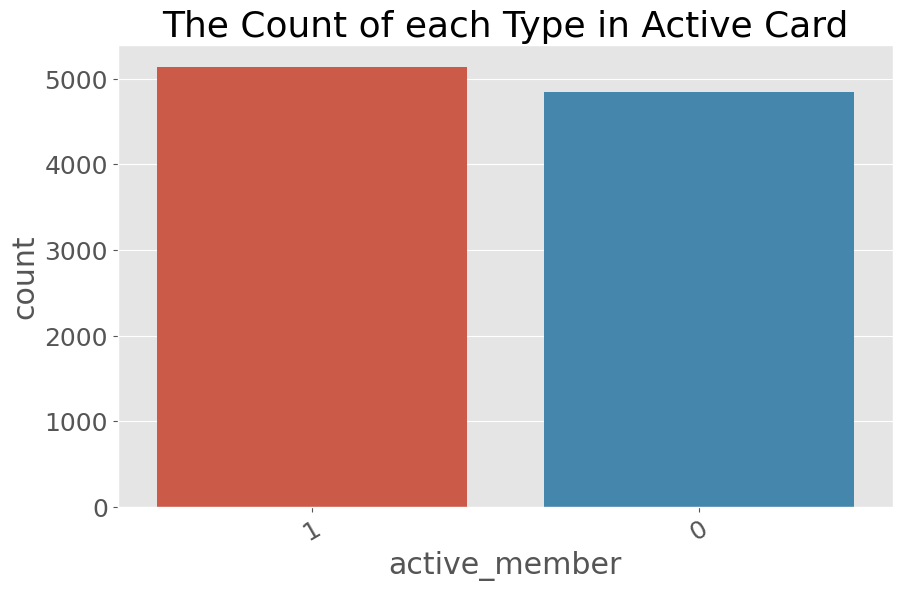

In [334]:
count_plot('active_member',"The Count of each Type in Active Card")

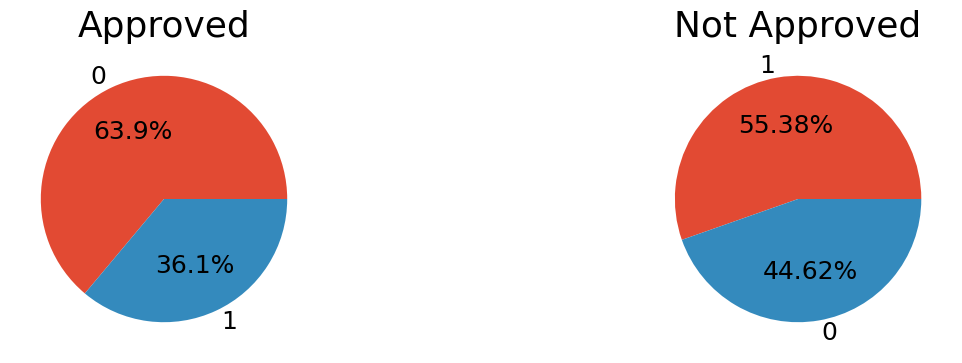

In [335]:
approved_vs_not('active_member')

In [336]:
get_insights('estimated_salary')

### Columns in estimated_salary its type is float64

### most appeared values 
[ 24924.92 101348.88  39488.04  89874.82  72500.68]

### Number of unique values is 
9984 

#### Random Values ####
[112465.19  55287.84 157239.6  113410.49 115146.4 ]


In [337]:
data['estimated_salary'].describe()

count      9985.000000
mean     100083.843078
std       57502.160354
min          11.580000
25%       51011.290000
50%      100236.020000
75%      149381.320000
max      199992.480000
Name: estimated_salary, dtype: float64

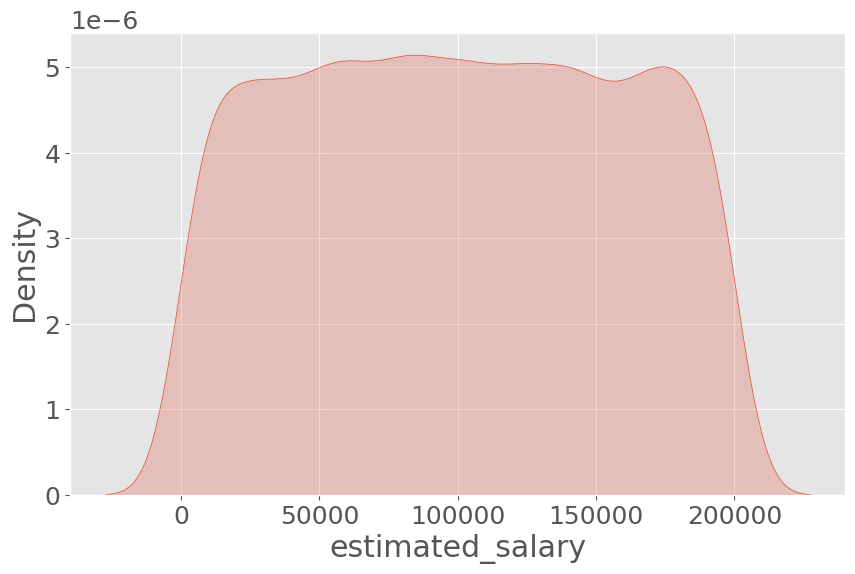

In [338]:
kde_plot('estimated_salary')

In [339]:
print(len(data[data['estimated_salary'] < 1000]))
data[data['estimated_salary'] < 1000]

59


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
149,416,France,Male,32,0,0.00,2,0,1,878.87,0
195,807,France,Male,35,3,174790.15,1,1,1,600.36,0
393,556,Spain,Male,38,8,0.00,2,0,0,417.41,1
396,557,France,Male,33,3,54503.55,1,1,1,371.05,0
559,850,Spain,Female,70,5,0.00,1,1,1,705.18,0
925,714,Germany,Female,36,1,101609.01,2,1,1,447.73,0
932,708,Germany,Female,42,8,192390.52,2,1,0,823.36,0
982,668,France,Male,32,7,0.00,2,1,1,777.37,0
1139,727,Spain,Female,57,1,109679.72,1,0,1,753.37,0
1451,551,France,Female,38,10,0.00,2,1,1,216.27,0


## Explantory Data analysis

In [340]:
def bar_mean(data_mean,col,title):
    plt.figure(figsize=(10,6))
    plt.bar(x=data_mean[col].index, height = data_mean[col].values)
    plt.title(title)
    plt.show()

In [341]:
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [342]:
country_mean = data.groupby('country').mean()
country_mean

,credit_score,age,tenure,balance,estimated_salary,churn
country,,,,,,
France,649.559752,38.421263,5.005995,62149.683563,99869.371998,0.161671
Germany,651.476457,39.720271,5.007981,119738.720375,101102.815004,0.324820
Spain,651.326061,38.854545,5.029091,61868.101822,99485.729798,0.166869


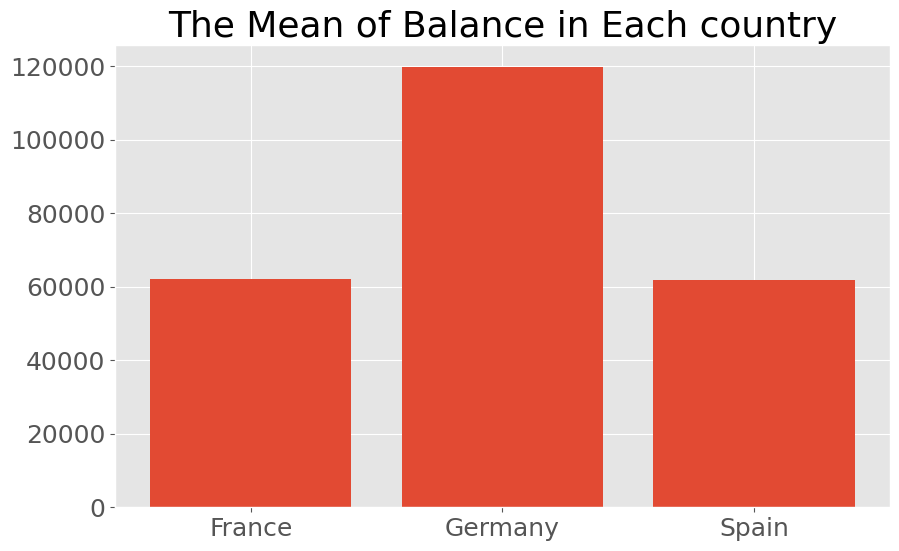

In [343]:
bar_mean(country_mean,'balance','The Mean of Balance in Each country')

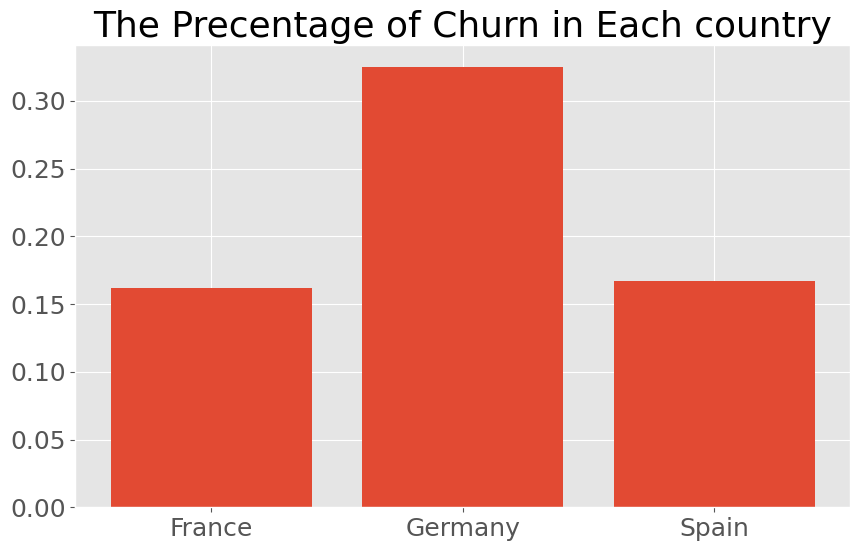

In [344]:
bar_mean(country_mean,'churn','The Precentage of Churn in Each country')

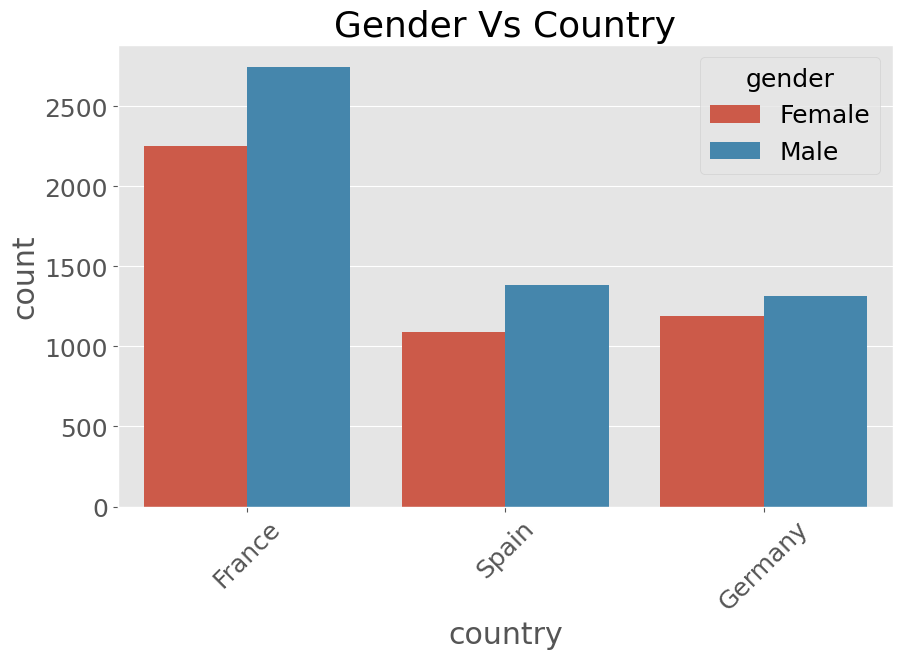

In [345]:
multi_count_plot('country','gender',"Gender Vs Country")

In [346]:
gender_mean = data.groupby('gender').mean()
gender_mean

,credit_score,age,tenure,balance,estimated_salary,churn
gender,,,,,,
Female,650.786643,39.181618,4.965836,75740.057441,100556.596233,0.250827
Male,650.222100,38.582416,5.050844,77194.045743,99690.142441,0.164831


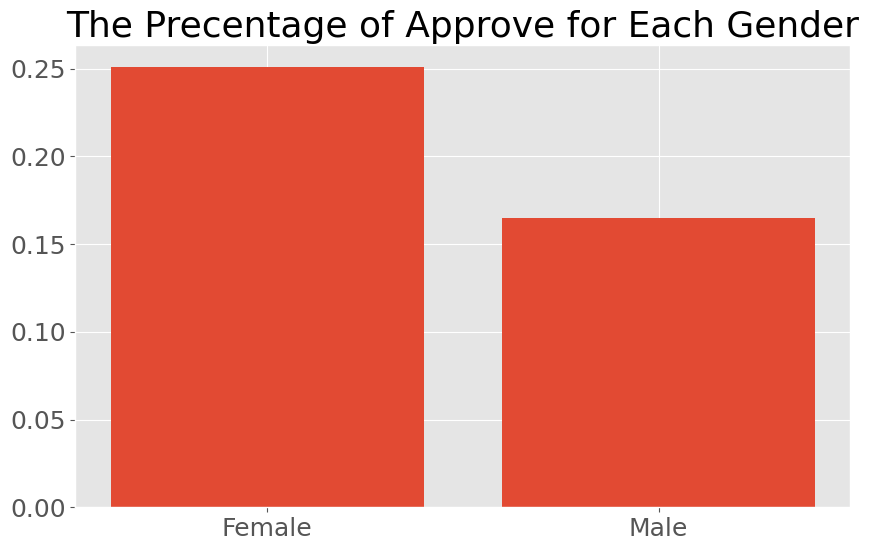

In [347]:
bar_mean(gender_mean,'churn','The Precentage of Approve for Each Gender')

In [348]:
tenure_mean = data.groupby('tenure').mean()
tenure_mean

,credit_score,age,balance,estimated_salary,churn
tenure,,,,,
0,652.043584,39.186441,79878.910630,102374.579128,0.230024
1,648.557599,39.337851,78585.427328,100572.135092,0.224589
2,652.787011,39.017192,76913.016753,98232.376094,0.191977
3,650.454816,38.935452,77701.647577,97601.624250,0.211519
4,651.502024,38.197368,74134.352966,99777.964777,0.205466
5,650.330366,39.246291,76519.893403,101341.853897,0.206726
6,647.246888,38.729253,74380.940612,99253.288828,0.203320
7,649.606031,38.367704,75551.634426,101257.240370,0.172179
8,647.934442,38.320939,77989.136477,100968.709354,0.191781


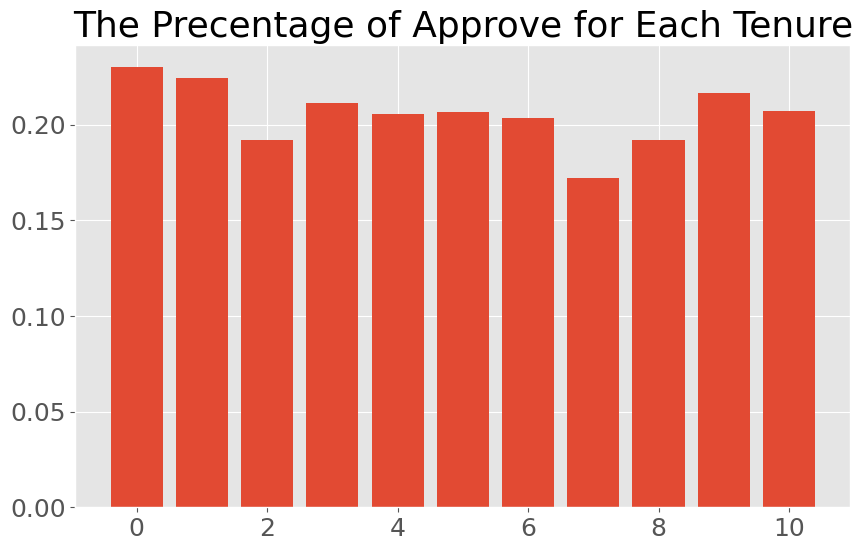

In [349]:
bar_mean(tenure_mean,'churn','The Precentage of Approve for Each Tenure')

In [350]:
active_memberMean = data.groupby('active_member').mean()
active_memberMean

,credit_score,age,tenure,balance,estimated_salary,churn
active_member,,,,,,
0,648.023102,37.988449,5.096741,77132.161720,100749.110349,0.268358
1,652.795990,39.672182,4.932451,75968.285342,99456.002756,0.143080


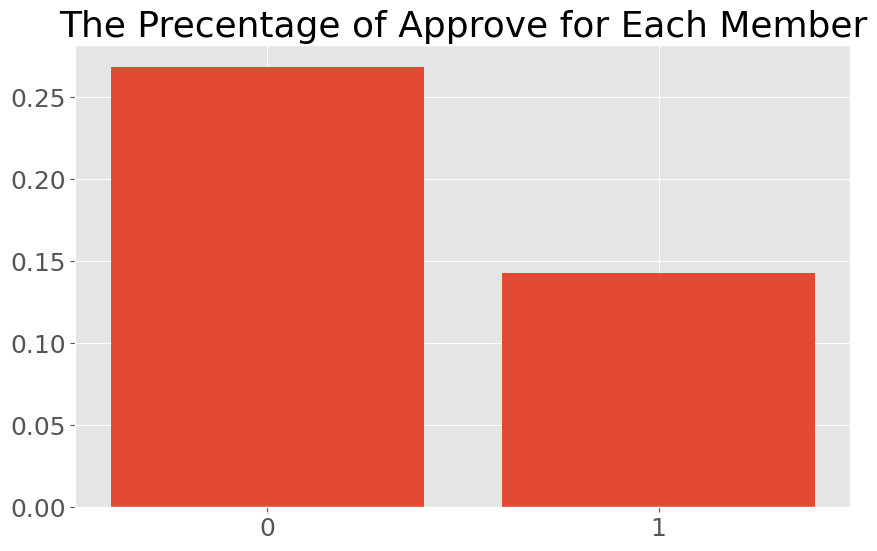

In [351]:
bar_mean(active_memberMean,'churn','The Precentage of Approve for Each Member')

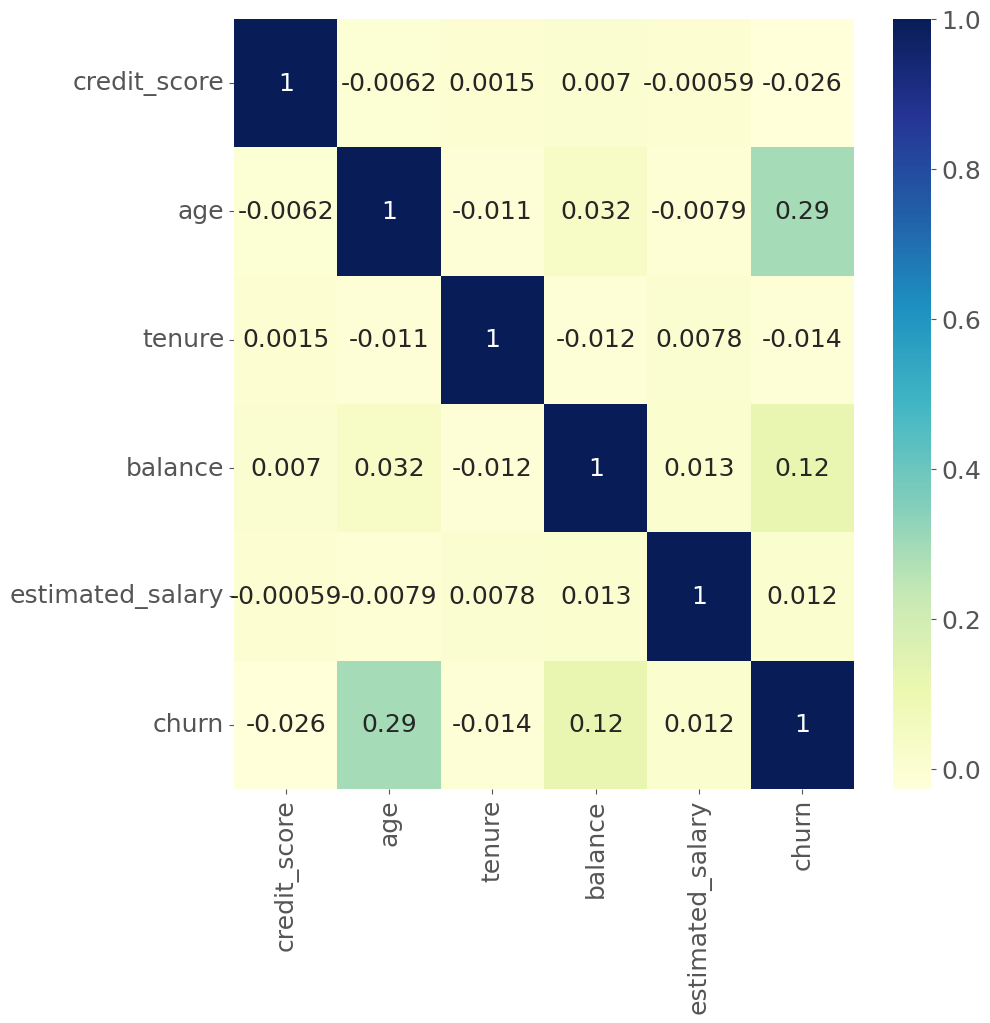

In [352]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True)
plt.show()

## Preprocessing

In [353]:
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [354]:
X = data.drop(['churn','credit_score'],axis=1)
Y = data['churn'].values

In [355]:
numerical = [col for col in X.columns if data[col].dtype != "O"]
numerical

['age', 'tenure', 'balance', 'estimated_salary']

In [356]:
categorical = [col for col in X.columns if data[col].dtype == "O"]
categorical

['country', 'gender', 'products_number', 'credit_card', 'active_member']

In [357]:
for col in categorical:
    print(col + " has : " + str(X[col].nunique()))

country has : 3
gender has : 2
products_number has : 4
credit_card has : 2
active_member has : 2


In [439]:
X = pd.get_dummies(X,drop_first=True)
X

,age,tenure,balance,estimated_salary,country_Germany,country_Spain,gender_Male,products_number_2,products_number_3,products_number_4,credit_card_1,active_member_1
0,42,2,0.00,101348.88,0,0,0,0,0,0,1,1
1,41,1,83807.86,112542.58,0,1,0,0,0,0,0,1
2,42,8,159660.80,113931.57,0,0,0,0,1,0,1,0
3,39,1,0.00,93826.63,0,0,0,1,0,0,0,0
4,43,2,125510.82,79084.10,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,39,5,0.00,96270.64,0,0,1,1,0,0,1,0
9996,35,10,57369.61,101699.77,0,0,1,0,0,0,1,1
9997,36,7,0.00,42085.58,0,0,0,0,0,0,0,1
9998,42,3,75075.31,92888.52,1,0,1,1,0,0,1,0


In [599]:
x_train, x_test,y_train,y_test = train_test_split(X ,Y ,test_size= .2,random_state=42,stratify=Y)
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((7988, 12), (1997, 12), (7988,), (1997,))

In [600]:
x_train

,age,tenure,balance,estimated_salary,country_Germany,country_Spain,gender_Male,products_number_2,products_number_3,products_number_4,credit_card_1,active_member_1
5132,66,9,0.00,65535.56,0,0,0,0,0,0,1,0
4045,36,5,0.00,17696.22,0,1,0,0,0,0,1,0
6047,40,9,0.00,11959.03,0,1,1,1,0,0,1,1
9557,67,6,148363.38,186995.17,1,0,1,0,0,0,1,1
3882,22,6,0.00,66393.89,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2285,50,3,129370.91,47775.34,1,0,1,0,0,1,1,1
1807,49,2,0.00,192298.84,0,0,0,0,0,0,0,1
4267,41,3,145754.91,101455.07,0,0,0,0,0,0,1,1
8000,36,8,102603.30,180693.61,1,0,1,1,0,0,1,1


In [601]:
from imblearn.over_sampling import RandomOverSampler

In [602]:
oversample = RandomOverSampler(sampling_strategy=1,random_state=42)

In [603]:
x_train,y_train = oversample.fit_resample(x_train,y_train)
x_train.shape,y_train.shape

((12718, 12), (12718,))

In [604]:
list(y_train).count(0) , list(y_train).count(1)

(6359, 6359)

In [605]:
scaler = StandardScaler()

In [606]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [607]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [608]:
models = {"Naive" : GaussianNB(),"Logistic Regression" : LogisticRegression(),
          "Gradient Boosting" : GradientBoostingClassifier(),"XGB" : XGBClassifier()}

In [609]:
for name , model in models.items():
    print(f"\n\n ### Model name is : {name}  ####")
    model.fit(x_train, y_train)
    print(f"\n Model Score on test set {model.score(x_test,y_test)} \n")
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))
    
    print("\n" + "-" * 30)



 ### Model name is : Naive  ####

 Model Score on test set 0.8222333500250375 

              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1590
           1       0.85      0.15      0.26       407

    accuracy                           0.82      1997
   macro avg       0.84      0.57      0.58      1997
weighted avg       0.83      0.82      0.77      1997


------------------------------


 ### Model name is : Logistic Regression  ####

 Model Score on test set 0.7596394591887832 

              precision    recall  f1-score   support

           0       0.93      0.76      0.83      1590
           1       0.45      0.77      0.57       407

    accuracy                           0.76      1997
   macro avg       0.69      0.76      0.70      1997
weighted avg       0.83      0.76      0.78      1997


------------------------------


 ### Model name is : Gradient Boosting  ####

 Model Score on test set 0.785177766649975 

           

In [610]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [611]:
xgb = XGBClassifier()

In [628]:
params = {
        "n_estimators" : [800,900,1000],
        'gamma': [.25 ,0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [6,7,8]
        }

In [629]:
random_search = RandomizedSearchCV(xgb, param_distributions=params,scoring='f1_micro')
random_search.fit(x_train, y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=0.5, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,...
                                           max_cat_to_onehot=None,
                                           max_d

In [630]:
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best hyperparameters:
{'subsample': 0.8, 'n_estimators': 900, 'max_depth': 8, 'gamma': 0.25}


In [631]:
xgb = XGBClassifier(**random_search.best_params_)

In [632]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.25, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=900, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [633]:
xgb.score(x_train, y_train)

1.0

In [634]:
xgb.score(x_test, y_test)

0.8432648973460191

In [635]:
y_pred = xgb.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1590
           1       0.63      0.57      0.60       407

    accuracy                           0.84      1997
   macro avg       0.76      0.74      0.75      1997
weighted avg       0.84      0.84      0.84      1997

